In [1]:
#Nama : Dziand Dafi Ginandjar
#NIM : 12321072

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import folium

from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from sklearn.cluster import DBSCAN, KMeans, SpectralClustering

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/dzianddafi/Documents/Semester 7/ML in Geophysics/TurkeyEQ.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             97 non-null     object 
 1   latitude         97 non-null     float64
 2   longitude        97 non-null     float64
 3   depth            97 non-null     float64
 4   mag              97 non-null     float64
 5   magType          97 non-null     object 
 6   nst              59 non-null     float64
 7   gap              97 non-null     int64  
 8   dmin             97 non-null     float64
 9   rms              97 non-null     float64
 10  net              97 non-null     object 
 11  id               97 non-null     object 
 12  updated          97 non-null     object 
 13  place            97 non-null     object 
 14  type             97 non-null     object 
 15  horizontalError  97 non-null     float64
 16  depthError       97 non-null     float64
 17  magError         9

In [4]:
df = df[['time', 'latitude', 'longitude', 'mag', 'depth']]
df.shape

(97, 5)

## EDA

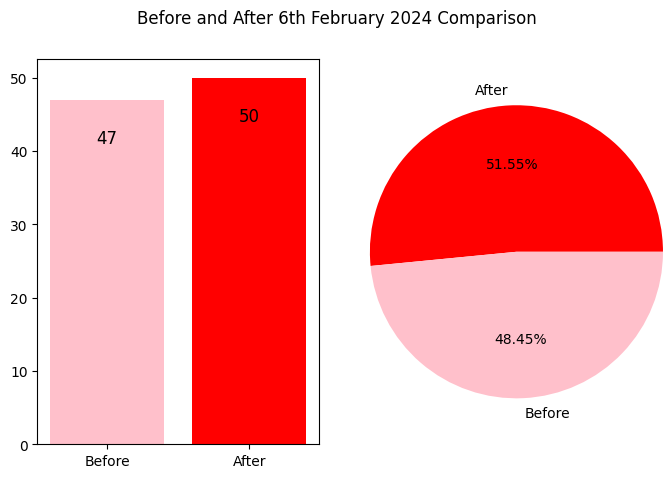

In [5]:
df_eda = df.copy()
df_eda['time'] = pd.to_datetime(df_eda['time'].apply(lambda x: x[:10]))
df_eda['happened'] = (df_eda['time'] < '2023-02-06').replace({True: 'Before', False: 'After'})

# Visualize
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,5))

fig.suptitle('Before and After 6th February 2024 Comparison')
ax[0].bar(df_eda['happened'].unique(), 
          df_eda['happened'].value_counts(),
          color=['r','pink'])

ax[0].text(0, 
           df_eda['happened'].value_counts()[0]-6 , 
           str(df_eda['happened'].value_counts()[0]), 
           ha='center', 
           fontsize=12)

ax[0].text(1, 
           df_eda['happened'].value_counts()[1]-6, 
           str(df_eda['happened'].value_counts()[1]), 
           ha='center', 
           fontsize=12)
ax[0].invert_xaxis()

ax[1].pie(df_eda['happened'].value_counts(), 
          labels=df_eda['happened'].unique(),
          autopct='%1.2f%%',
          colors=['r','pink'],
          radius=1.3)
plt.show()

### Key takeaways
  
The amount of earthquakes happened during February 6th 2023 to January 1st 2024 is 50 which presents 51.55% of the data being used in this project. Although the span of time is much shorter, the amount of earthquake that occured during this span of time ( under 1 year ) has already overcome the amount of earthquakes during Janurary 1st 2020 to February 6th 2023 ( over 3 years )

# Modelling

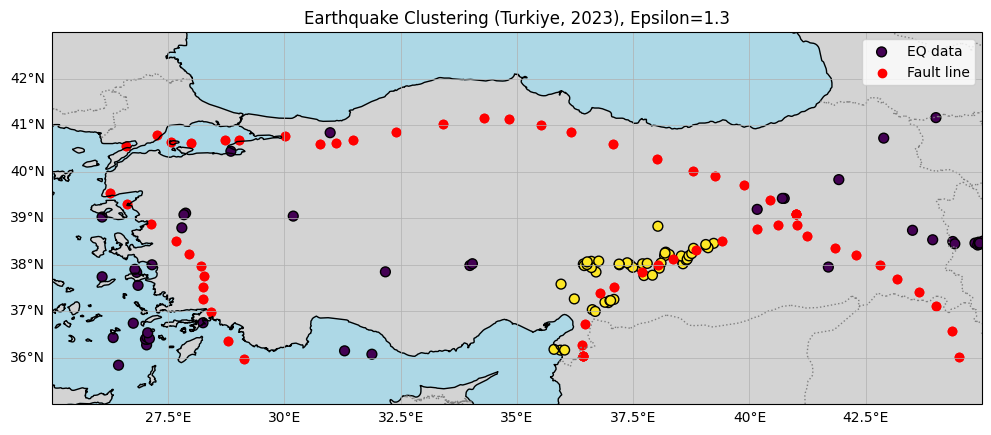

In [6]:
X = np.array(df['longitude']).reshape(-1, 1)
y = np.array(df['latitude'])

lonmin = df['longitude'].min()
lonmax = df['longitude'].max()

latmin = df['latitude'].min()
latmax = df['latitude'].max()

plate = pd.read_csv('all.csv')
plate = plate.query(f'{latmin} < lat < {latmax}')
plate = plate.query(f'{lonmin} < lon < {lonmax}')

#Using DBSCAN
dbscan = DBSCAN(eps=1.3, min_samples=30)
clusters = dbscan.fit_predict(X)
df['dbscan'] = clusters
df['dbscan'].replace(-1, 1, inplace=True)

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,10))

#Defining the location of Turkiye
ax.set_extent([25, 45, 35, 43])  

#Adding some features on map
ax.coastlines(resolution='10m') 
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray') 
ax.add_feature(cfeature.LAND, color='lightgray') 
ax.add_feature(cfeature.OCEAN, color='lightblue')  

#Adding gridlines
gridlines = ax.gridlines(draw_labels=True, linestyle="-", linewidth=0.5)
gridlines.top_labels = False 
gridlines.right_labels = False 

ax.grid()
ax.scatter(X, y, c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, label='EQ data')
ax.scatter(plate['lon'], plate['lat'], marker='o', c='r', label='Fault line')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
ax.set_title('Earthquake Clustering (Turkiye, 2023), Epsilon=1.3')

plt.savefig(r'/Users/dzianddafi/Documents/Semester 7/ML in Geophysics/eps1-3.png')
plt.show()

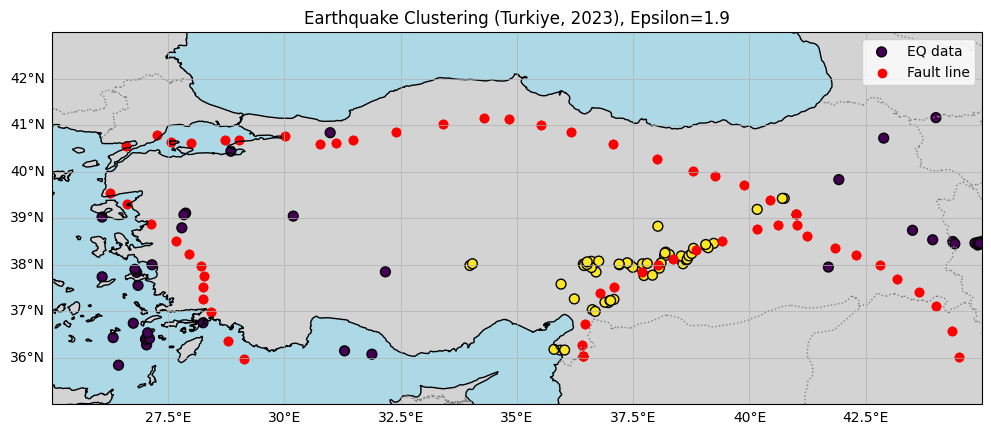

In [7]:
#Using DBSCAN
dbscan = DBSCAN(eps=1.9, min_samples=30)
clusters = dbscan.fit_predict(X)
df['dbscan'] = clusters
df['dbscan'].replace(-1, 1, inplace=True)

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,10))

#Defining the location of Turkiye
ax.set_extent([25, 45, 35, 43])  

#Adding some features on map
ax.coastlines(resolution='10m') 
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray') 
ax.add_feature(cfeature.LAND, color='lightgray') 
ax.add_feature(cfeature.OCEAN, color='lightblue')  

#Adding gridlines
gridlines = ax.gridlines(draw_labels=True, linestyle="-", linewidth=0.5)
gridlines.top_labels = False 
gridlines.right_labels = False 

ax.grid()
ax.scatter(X, y, c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, label='EQ data')
ax.scatter(plate['lon'], plate['lat'], marker='o', c='r', label='Fault line')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
ax.set_title('Earthquake Clustering (Turkiye, 2023), Epsilon=1.9')

plt.savefig(r'/Users/dzianddafi/Documents/Semester 7/ML in Geophysics/eps1-9.png')
plt.show()

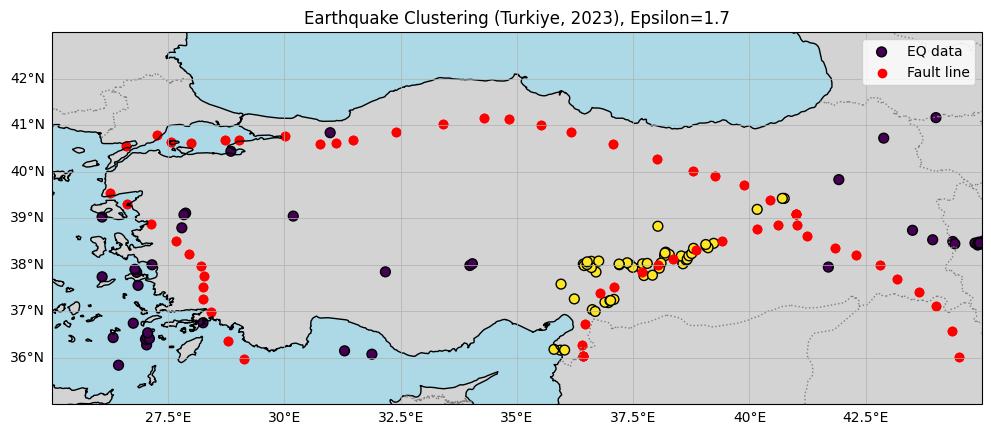

In [8]:
#Using DBSCAN
dbscan = DBSCAN(eps=1.7, min_samples=30)
clusters = dbscan.fit_predict(X)
df['dbscan'] = clusters
df['dbscan'].replace(-1, 1, inplace=True)

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,10))

#Defining the location of Turkiye
ax.set_extent([25, 45, 35, 43])  

#Adding some features on map
ax.coastlines(resolution='10m') 
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray') 
ax.add_feature(cfeature.LAND, color='lightgray') 
ax.add_feature(cfeature.OCEAN, color='lightblue')  

#Adding gridlines
gridlines = ax.gridlines(draw_labels=True, linestyle="-", linewidth=0.5)
gridlines.top_labels = False 
gridlines.right_labels = False 

ax.grid()
ax.scatter(X, y, c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, label='EQ data')
ax.scatter(plate['lon'], plate['lat'], marker='o', c='r', label='Fault line')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
ax.set_title('Earthquake Clustering (Turkiye, 2023), Epsilon=1.7')

plt.savefig(r'/Users/dzianddafi/Documents/Semester 7/ML in Geophysics/eps1-7.png')
plt.show()

In [9]:
#Define marker color
def function(item):
    if item == 1:
        return 'black'
    else:
        return 'red'

df['marker'] = df['dbscan'].apply(function)
df

,time,latitude,longitude,mag,depth,dbscan,marker
0,2023-12-04T07:42:20.496Z,40.4371,28.8480,5.1,10.117,1,black
1,2023-11-23T14:46:09.122Z,38.0841,38.5520,5.3,10.000,0,red
2,2023-08-10T17:48:01.234Z,38.2665,38.2011,5.2,10.000,0,red
3,2023-07-25T05:44:51.283Z,37.5794,35.9482,5.5,13.116,0,red
4,2023-04-26T20:00:34.782Z,36.4294,26.3159,5.1,116.496,1,black
...,...,...,...,...,...,...,...
92,2020-02-23T05:53:01.055Z,38.4465,44.4168,5.8,10.000,1,black
93,2020-01-28T11:26:15.000Z,39.1061,27.8750,5.0,10.000,1,black
94,2020-01-25T16:30:11.109Z,38.3615,39.1096,5.1,10.000,0,red
95,2020-01-24T17:55:14.147Z,38.4312,39.0609,6.7,10.000,0,red


In [10]:
long = np.array(df['longitude'])
lat = np.array(df['latitude'])

long.shape

(97,)

In [11]:
lat.shape

(97,)

In [12]:
coordinate = np.array([long, lat]).T
coordinate.shape

(97, 2)

In [13]:
site_map = folium.Map(zoom_start=10)

In [14]:
# Plot hasil clustering berdasarkan marker
marker_cluster = MarkerCluster()
site_map.add_child(marker_cluster)

for index, record in df.iterrows():
    marker = folium.Marker(location=[record['latitude'], record['longitude']], icon=folium.map.Icon(color='white', icon_color=record['marker']))
    marker_cluster.add_child(marker)

for i in range (len(df.index)):
    coordinate = [df["latitude"][i], df["longitude"][i]]
    circle = folium.Circle(coordinate, radius=100, color='#d35400', fill=True).add_child(folium.Popup(df["mag"][i]))
    marker = folium.map.Marker(
            coordinate,
            icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % df["mag"][i],
            )
        )
    site_map.add_child(circle)
    site_map.add_child(marker)


site_map

# Analysis

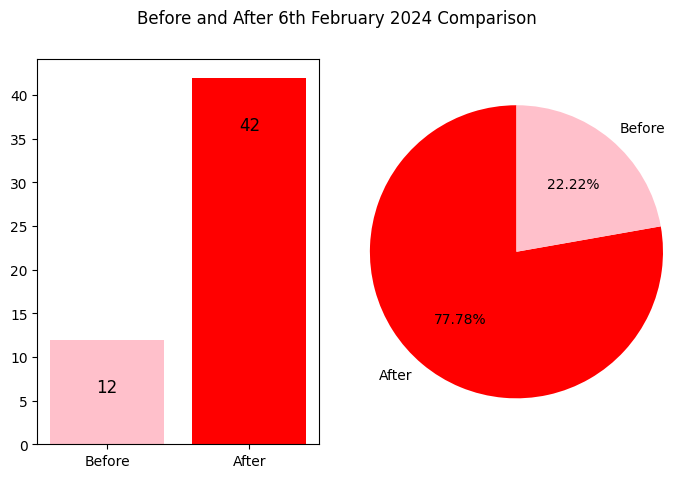

In [15]:
df_an = df[df['dbscan']==0]

df_an['time'] = pd.to_datetime(df_an['time'].apply(lambda x: x[:10]))
df_an['happened'] = (df_an['time'] < '2023-02-06').replace({True: 'Before', False: 'After'})

# Visualize
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,5))

fig.suptitle('Before and After 6th February 2024 Comparison')
ax[0].bar(df_an['happened'].unique(), 
          df_an['happened'].value_counts(),
          color=['r','pink'])

ax[0].text(0, 
           df_an['happened'].value_counts()[0]-6 , 
           str(df_an['happened'].value_counts()[0]), 
           ha='center', 
           fontsize=12)

ax[0].text(1, 
           df_an['happened'].value_counts()[1]-6, 
           str(df_an['happened'].value_counts()[1]), 
           ha='center', 
           fontsize=12)
ax[0].invert_xaxis()

ax[1].pie(df_an['happened'].value_counts(), 
          labels=df_an['happened'].unique(),
          autopct='%1.2f%%',
          colors=['r','pink'],
          startangle=90,
          radius=1.3)
plt.show()

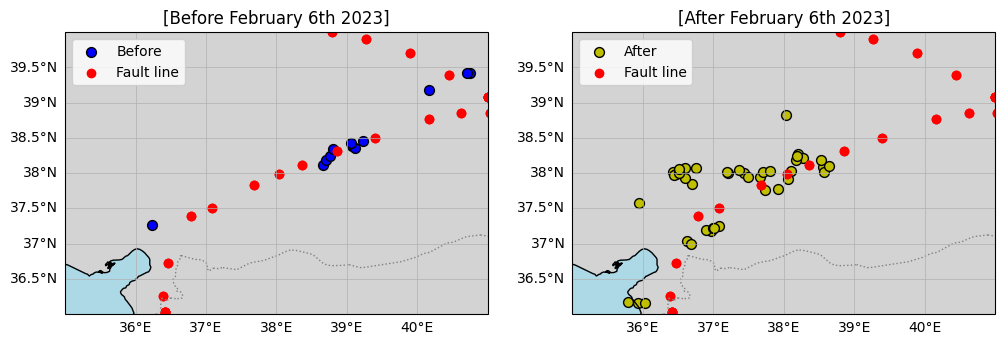

In [16]:
df_an_bf = df_an[df_an['happened']=='Before']
df_an_af = df_an[df_an['happened']=='After']

X0, y0 = df_an_bf['longitude'], df_an_bf['latitude']
X1, y1 = df_an_af['longitude'], df_an_af['latitude']

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 8), nrows=1, ncols=2)

#Defining the location of Turkiye
ax[0].set_extent([35, 41, 36, 40]) 
ax[1].set_extent([35, 41, 36, 40]) 

#Adding some features on map
ax[0].coastlines(resolution='10m') 
ax[0].add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray') 
ax[0].add_feature(cfeature.LAND, color='lightgray') 
ax[0].add_feature(cfeature.OCEAN, color='lightblue')  

ax[1].coastlines(resolution='10m') 
ax[1].add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray') 
ax[1].add_feature(cfeature.LAND, color='lightgray') 
ax[1].add_feature(cfeature.OCEAN, color='lightblue')  

#Adding gridlines
gridlinesb = ax[0].gridlines(draw_labels=True, linestyle="-", linewidth=0.5)
gridlinesb.top_labels = False 
gridlinesb.right_labels = False 

gridlinesa = ax[1].gridlines(draw_labels=True, linestyle="-", linewidth=0.5)
gridlinesa.top_labels = False 
gridlinesa.right_labels = False 

#Plot
ax[0].grid()
ax[0].scatter(X0, y0, c='b', marker='o', edgecolor='k', s=50, label='Before')
ax[0].scatter(plate['lon'], plate['lat'], marker='o', c='r', label='Fault line')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].legend()
ax[0].set_title('[Before February 6th 2023]')

ax[1].grid()
ax[1].scatter(X1, y1, c='y', marker='o', edgecolor='k', s=50, label='After')
ax[1].scatter(plate['lon'], plate['lat'], marker='o', c='r', label='Fault line')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].legend()
ax[1].set_title('[After February 6th 2023]')
plt.show()

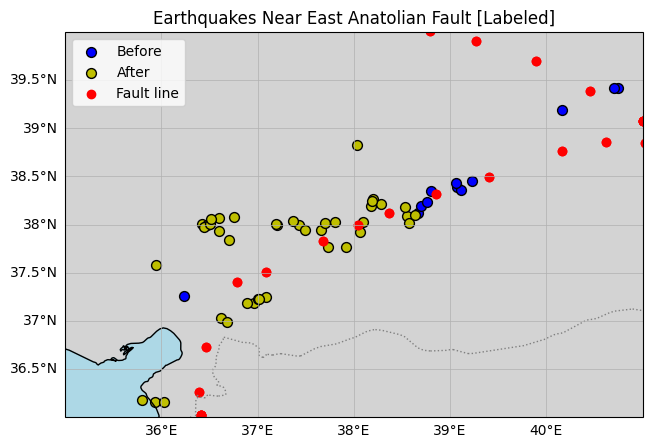

In [17]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8, 5))

#Defining the location of Turkiye
ax.set_extent([35, 41, 36, 40]) 

#Adding some features on map
ax.coastlines(resolution='10m') 
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray') 
ax.add_feature(cfeature.LAND, color='lightgray') 
ax.add_feature(cfeature.OCEAN, color='lightblue')  

#Adding gridlines
gridlines = ax.gridlines(draw_labels=True, linestyle="-", linewidth=0.5)
gridlines.top_labels = False 
gridlines.right_labels = False 

ax.grid()
ax.scatter(X0, y0, c='b', marker='o', edgecolor='k', s=50, label='Before')
ax.scatter(X1, y1, c='y', marker='o', edgecolor='k', s=50, label='After')
ax.scatter(plate['lon'], plate['lat'], marker='o', c='r', label='Fault line')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Earthquakes Near East Anatolian Fault [Labeled]')
ax.legend()
plt.show()

### Key takeaways
  
Along with the time goes on, the earthquake location seems like moving towards the south west area of the East Anatolian Fault.

# Thank You